In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sys



def LF_linear(p, u0, ua, ub, Ix, tN, Deltax, Deltat):
    # Solves the PDE in a < x < b, t > 0
    #
    # u_t + p u_x = 0
    #
    # u(x,0) = u0(x)
    #
    # with boudnary conditions
    # u(a,t) = ua
    # u(b,t) = ub
    
    (a,b) = Ix
    
    if abs(p*Deltat/Deltax)>1:
        sys.exit("The deltas violate the stability condition for this method.");

    Nx = int((b-a)/Deltax);
    Nt = int((tN-0)/Deltat);
    
    sol = np.zeros([Nt,Nx]);
    for ix in range(Nx):
        sol[0,ix] = u0(a+Deltax*ix);
        
    for it in range(1,Nt):
        sol[it,0] = ua;
        sol[it,Nx-1]=ub;
        for ix in range(1,Nx-1):
            sol[it,ix] = (sol[it-1,ix-1]+sol[it-1,ix+1])/2 - p*Deltat/Deltax * (sol[it-1,ix+1]-sol[it-1,ix-1])/2

    return sol

        



Define the initial function $\rho_0$

In [27]:
rho_min = 20
rho_max=120

def rho0(x):
    if x<-1: return rho_min
    elif x>0: return rho_max
    else: return rho_max + (rho_max-rho_min)*x;

vrho = np.vectorize(rho0)

Create a plot of the initial function.

Also set up the **first** approximation: $\Delta_x$ and $\Delta_t$

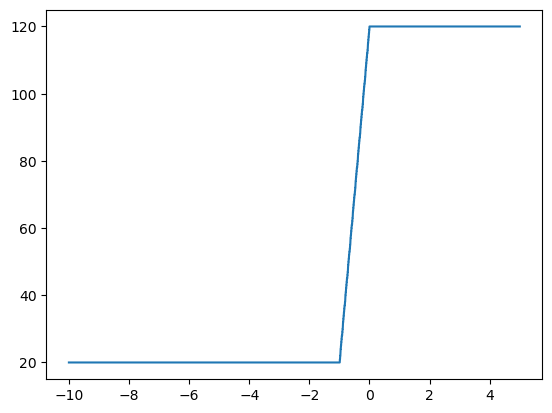

In [39]:
Nx = 3001
a = -10
b = 5
intervalx = (a,b)
Deltax = (b-a)/Nx

tN = 10
Nt = 4000
Deltat = tN/Nt

X = np.linspace(a,b,Nx);

plt.plot(X,vrho(X));

Run the **first** approximation and plot it for each 0.5 hours

In [40]:
rhoa = 20
rhob = 120
p = -1.2

rho = LF_linear(p, vrho, rhoa, rhob, intervalx, tN, Deltax, Deltat)

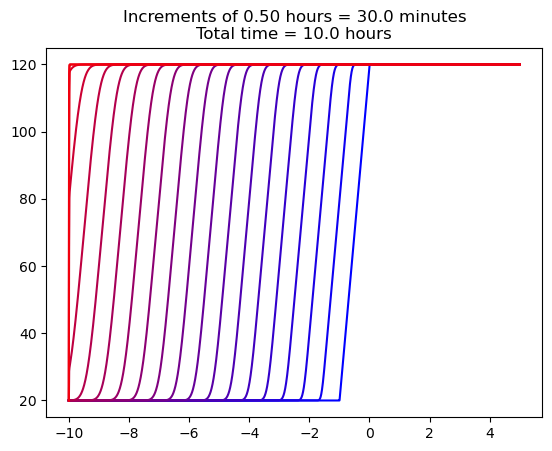

In [41]:
b_range=np.linspace(0, 1, Nt)

time_step = 200
i=0
while (i < Nt):
    plt.plot(X,rho[i,:],color=(b_range[i], 0, 1-b_range[i]))
    i += time_step

plt.title(f"Increments of {time_step*Deltat:.2f} hours = {time_step*Deltat*60:.1f} minutes\nTotal time = {tN:.1f} hours");


Also set up the **second** approximation: $\Delta_x$ and $\Delta_t$

Run it and plot it for every 1 hours

In [36]:
Nx = 1501
a = -10
b = 5
intervalx = (a,b)
Deltax = (b-a)/Nx

tN = 10
Nt = 2000
Deltat = tN/Nt

X = np.linspace(a,b,Nx);

# plt.plot(X,vrho(X))

rhoa = 20
rhob = 120
p = -1.2

rho = LF_linear(p, vrho, rhoa, rhob, intervalx, tN, Deltax, Deltat)

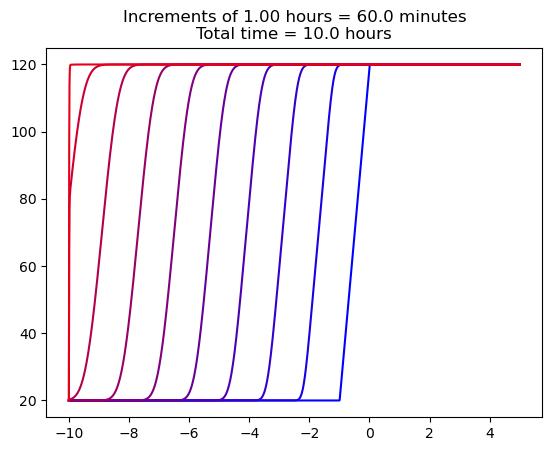

In [38]:
b_range=np.linspace(0, 1, Nt)
time_step = 200

i=0
while (i < Nt):
    plt.plot(X,rho[i,:],color=(b_range[i], 0, 1-b_range[i]))
    i += time_step

plt.title(f"Increments of {time_step*Deltat:.2f} hours = {time_step*Deltat*60:.1f} minutes\nTotal time = {tN:.1f} hours");

This method creates some diffusion: you can see the sharp initial condition rounding up more and more as time passes

You can also see that for smaller time+space steps, the diffusion is smaller